# Objective:
1. Defination: we would like to identify/predict who is going to become the defaulter
2. defaulter: the person who did not pay the bill for contionously 6 months those are defaulters
3. data should have both acquistion file and performance file
4. curate the dat(Data sanity check), explore the data, treat the data
5. varaible creation,varaiable reduction 
6. model building and model validation
7. providing the recommendations
8. Model deployment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [2]:
col_acq = ['LoanID','Channel','SellerName','OrInterestRate','OrUnpaidPrinc','OrLoanTerm',
         'OrDate','FirstPayment','OrLTV','OrCLTV','NumBorrow','DTIRat','CreditScore',
        'FTHomeBuyer','LoanPurpose','PropertyType','NumUnits','OccStatus','PropertyState',
        'Zip','MortInsPerc','ProductType','CoCreditScore','MortInsType','RelMortInd']

col_per = ['LoanID','ReportingDate','Servicer','CurrInterestRate','CAUPB','LoanAge','MonthsToMaturity',
          'AdMonthsToMaturity','MaturityDate','MSA','CurDelStatus','ModFlag','ZeroBalCode','ZeroBalEffDate',
          'LastInstallDate','ForeclosureDate','DispositionDate','ForeclosureCost','RepairCost','AssetRecCost','MiscCostsPF',
           'ATFHP','NetSaleProceeds','CreditEnhProceeds','RPMWP','OtherForePro','NonInterestUPB','PricipleForgiven','RMWPF',
          'FPWA','ServicingIndicator']

In [3]:
acq07Q4=pd.read_csv("C:\\Users\\Himanshu_Mishra\\Acquisition_2007Q4.txt",sep="|",names=col_acq)

per07Q4=pd.read_csv("C:\\Users\\Himanshu_Mishra\\Performance_2007Q4.txt",sep="|",names=col_per, usecols=[0,1, 15])


In [4]:
print("dimensions of acqistion data",acq07Q4.shape)
print("dimensions of performance data",per07Q4.shape)

dimensions of acqistion data (391209, 25)
dimensions of performance data (20864257, 3)


In [5]:
per07Q4.head()

,LoanID,ReportingDate,ForeclosureDate
0,100002296854,11/01/2007,NaN
1,100002296854,12/01/2007,NaN
2,100002296854,01/01/2008,NaN
3,100002296854,02/01/2008,NaN
4,100002296854,03/01/2008,NaN


In [6]:
per07Q4.dtypes

LoanID              int64
ReportingDate      object
ForeclosureDate    object
dtype: object

In [7]:
per07Q4[per07Q4["LoanID"]==100002296854]

,LoanID,ReportingDate,ForeclosureDate
0,100002296854,11/01/2007,NaN
1,100002296854,12/01/2007,NaN
2,100002296854,01/01/2008,NaN
3,100002296854,02/01/2008,NaN
4,100002296854,03/01/2008,NaN
5,100002296854,04/01/2008,NaN
6,100002296854,05/01/2008,NaN
7,100002296854,06/01/2008,NaN
8,100002296854,07/01/2008,NaN
9,100002296854,08/01/2008,NaN


In [8]:
per07Q4.tail()

,LoanID,ReportingDate,ForeclosureDate
20864252,999999565669,01/01/2015,NaN
20864253,999999565669,02/01/2015,NaN
20864254,999999565669,03/01/2015,NaN
20864255,999999565669,04/01/2015,NaN
20864256,999999565669,05/01/2015,NaN


In [9]:
per07Q4[per07Q4["LoanID"]==999999565669]

,LoanID,ReportingDate,ForeclosureDate
20864166,999999565669,11/01/2007,NaN
20864167,999999565669,12/01/2007,NaN
20864168,999999565669,01/01/2008,NaN
20864169,999999565669,02/01/2008,NaN
20864170,999999565669,03/01/2008,NaN
...,...,...,...
20864252,999999565669,01/01/2015,NaN
20864253,999999565669,02/01/2015,NaN
20864254,999999565669,03/01/2015,NaN
20864255,999999565669,04/01/2015,NaN


In [10]:
acq07Q4.head()

,LoanID,Channel,SellerName,OrInterestRate,OrUnpaidPrinc,OrLoanTerm,OrDate,FirstPayment,OrLTV,OrCLTV,...,PropertyType,NumUnits,OccStatus,PropertyState,Zip,MortInsPerc,ProductType,CoCreditScore,MortInsType,RelMortInd
0,100002296854,C,"BANK OF AMERICA, N.A.",6.625,343000,360,10/2007,12/2007,86,86.0,...,PU,1,P,CO,809,25.0,FRM,756.0,2.0,N
1,100006876815,C,"BANK OF AMERICA, N.A.",6.250,400000,360,10/2007,12/2007,62,62.0,...,SF,1,P,CA,920,NaN,FRM,790.0,NaN,N
2,100008184591,B,OTHER,6.625,81000,360,11/2007,01/2008,64,82.0,...,SF,1,P,LA,708,NaN,FRM,NaN,NaN,N
3,100008870761,B,AMTRUST BANK,6.500,119000,360,11/2007,01/2008,71,71.0,...,CO,1,P,IL,600,NaN,FRM,NaN,NaN,N
4,100013284158,B,"BANK OF AMERICA, N.A.",6.625,205000,360,10/2007,12/2007,27,27.0,...,SF,1,P,CA,907,NaN,FRM,NaN,NaN,N


In [11]:
# identify is there any duplicate records in  acquisiton file
acq07Q4=acq07Q4.drop_duplicates(keep="last")
acq07Q4.shape

(391209, 25)

In [12]:
per07Q4.drop_duplicates(subset='LoanID', keep='last', inplace=True)

In [13]:
per07Q4.shape

(391209, 3)

In [14]:
per07Q4.drop(["ReportingDate"],axis=1,inplace=True)

In [15]:
acq_perf=pd.merge(acq07Q4,per07Q4,on='LoanID',how="inner")

In [16]:
acq_perf.shape

(391209, 26)

In [17]:
# description about abour acq_perf: indetailed information about table
acq_perf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391209 entries, 0 to 391208
Data columns (total 26 columns):
LoanID             391209 non-null int64
Channel            391209 non-null object
SellerName         391209 non-null object
OrInterestRate     391208 non-null float64
OrUnpaidPrinc      391209 non-null int64
OrLoanTerm         391209 non-null int64
OrDate             391209 non-null object
FirstPayment       391209 non-null object
OrLTV              391209 non-null int64
OrCLTV             391177 non-null float64
NumBorrow          391203 non-null float64
DTIRat             379728 non-null float64
CreditScore        390583 non-null float64
FTHomeBuyer        391209 non-null object
LoanPurpose        391209 non-null object
PropertyType       391209 non-null object
NumUnits           391209 non-null int64
OccStatus          391209 non-null object
PropertyState      391209 non-null object
Zip                391209 non-null int64
MortInsPerc        84925 non-null float64
ProductT

In [18]:
acq_perf["ForeclosureDate"].value_counts()

09/01/2010    768
06/01/2010    766
08/01/2010    764
03/01/2011    754
07/01/2010    733
             ... 
05/01/2008     20
09/01/2018     19
04/01/2008     12
03/01/2008      4
02/01/2008      1
Name: ForeclosureDate, Length: 128, dtype: int64

In [19]:
acq_perf.columns

Index(['LoanID', 'Channel', 'SellerName', 'OrInterestRate', 'OrUnpaidPrinc',
       'OrLoanTerm', 'OrDate', 'FirstPayment', 'OrLTV', 'OrCLTV', 'NumBorrow',
       'DTIRat', 'CreditScore', 'FTHomeBuyer', 'LoanPurpose', 'PropertyType',
       'NumUnits', 'OccStatus', 'PropertyState', 'Zip', 'MortInsPerc',
       'ProductType', 'CoCreditScore', 'MortInsType', 'RelMortInd',
       'ForeclosureDate'],
      dtype='object')

In [20]:
acq_perf.head()

,LoanID,Channel,SellerName,OrInterestRate,OrUnpaidPrinc,OrLoanTerm,OrDate,FirstPayment,OrLTV,OrCLTV,...,NumUnits,OccStatus,PropertyState,Zip,MortInsPerc,ProductType,CoCreditScore,MortInsType,RelMortInd,ForeclosureDate
0,100002296854,C,"BANK OF AMERICA, N.A.",6.625,343000,360,10/2007,12/2007,86,86.0,...,1,P,CO,809,25.0,FRM,756.0,2.0,N,NaN
1,100006876815,C,"BANK OF AMERICA, N.A.",6.250,400000,360,10/2007,12/2007,62,62.0,...,1,P,CA,920,NaN,FRM,790.0,NaN,N,NaN
2,100008184591,B,OTHER,6.625,81000,360,11/2007,01/2008,64,82.0,...,1,P,LA,708,NaN,FRM,NaN,NaN,N,NaN
3,100008870761,B,AMTRUST BANK,6.500,119000,360,11/2007,01/2008,71,71.0,...,1,P,IL,600,NaN,FRM,NaN,NaN,N,NaN
4,100013284158,B,"BANK OF AMERICA, N.A.",6.625,205000,360,10/2007,12/2007,27,27.0,...,1,P,CA,907,NaN,FRM,NaN,NaN,N,NaN


In [21]:
from datetime import datetime
datetime.strptime("10/2007", '%m/%Y')

datetime.datetime(2007, 10, 1, 0, 0)

In [22]:
# converting month,year to full date format, which includes day,month,year
acq_perf["FirstPayment"]=pd.to_datetime(acq_perf["FirstPayment"])
acq_perf["OrDate"]=pd.to_datetime(acq_perf["OrDate"])

In [23]:
acq_perf.head()

,LoanID,Channel,SellerName,OrInterestRate,OrUnpaidPrinc,OrLoanTerm,OrDate,FirstPayment,OrLTV,OrCLTV,...,NumUnits,OccStatus,PropertyState,Zip,MortInsPerc,ProductType,CoCreditScore,MortInsType,RelMortInd,ForeclosureDate
0,100002296854,C,"BANK OF AMERICA, N.A.",6.625,343000,360,2007-10-01,2007-12-01,86,86.0,...,1,P,CO,809,25.0,FRM,756.0,2.0,N,NaN
1,100006876815,C,"BANK OF AMERICA, N.A.",6.250,400000,360,2007-10-01,2007-12-01,62,62.0,...,1,P,CA,920,NaN,FRM,790.0,NaN,N,NaN
2,100008184591,B,OTHER,6.625,81000,360,2007-11-01,2008-01-01,64,82.0,...,1,P,LA,708,NaN,FRM,NaN,NaN,N,NaN
3,100008870761,B,AMTRUST BANK,6.500,119000,360,2007-11-01,2008-01-01,71,71.0,...,1,P,IL,600,NaN,FRM,NaN,NaN,N,NaN
4,100013284158,B,"BANK OF AMERICA, N.A.",6.625,205000,360,2007-10-01,2007-12-01,27,27.0,...,1,P,CA,907,NaN,FRM,NaN,NaN,N,NaN


In [24]:
# is there any loan ids first payment is greater than origination date
acq_perf["date_diff"]=acq_perf["FirstPayment"]-acq_perf["OrDate"]

In [25]:
acq_perf["date_diff"].value_counts()/len(acq_perf)*100

61 days    86.255684
62 days     7.288176
92 days     2.458532
31 days     1.668418
30 days     1.241791
91 days     0.832547
59 days     0.230567
90 days     0.010992
89 days     0.005879
28 days     0.005112
0 days      0.002301
Name: date_diff, dtype: float64

# insights: 96% of customers are paying first payment after 60 days of loan origination date

In [26]:
# renaming the foreclosure date to default
acq_perf.rename(index=int, columns={"ForeclosureDate": 'Default'}, inplace=True)

# defination of defaulter:
1. if default is missing then those customers non defaulters --- customers are active
2. if default date is presented then those customers are called as defaulters --- loans have been closed

In [27]:
acq_perf["Default"].fillna(0,inplace=True)

In [28]:
acq_perf["Default"].value_counts()

0             355985
09/01/2010       768
06/01/2010       766
08/01/2010       764
03/01/2011       754
               ...  
05/01/2008        20
09/01/2018        19
04/01/2008        12
03/01/2008         4
02/01/2008         1
Name: Default, Length: 129, dtype: int64

In [29]:
acq_perf["Default"]=np.where(acq_perf["Default"]==0,0,1)

In [30]:
acq_perf["Default"].value_counts()/len(acq_perf)*100

0    90.996117
1     9.003883
Name: Default, dtype: float64

# in given data, 9% of customers are defaulter

In [31]:
# comparing date diff with defaulters
pd.crosstab(acq_perf["date_diff"],acq_perf["Default"])

Default,0,1
date_diff,,
0 days,9,0
28 days,20,0
30 days,4406,452
31 days,5944,583
59 days,836,66
61 days,307161,30279
62 days,25895,2617
89 days,20,3
90 days,41,2


In [32]:
diff_def_percent=acq_perf[["date_diff","Default"]].groupby(["date_diff","Default"]).size()

In [33]:
diff1=diff_def_percent.groupby(level=[0]).apply(lambda x:x/x.sum()).reset_index()
diff1

,date_diff,Default,0
0,0 days,0,1.000000
1,28 days,0,1.000000
2,30 days,0,0.906958
3,30 days,1,0.093042
4,31 days,0,0.910679
5,31 days,1,0.089321
6,59 days,0,0.926829
7,59 days,1,0.073171
8,61 days,0,0.910268
9,61 days,1,0.089732


In [34]:
diff1[diff1["Default"]==1]

,date_diff,Default,0
3,30 days,1,0.093042
5,31 days,1,0.089321
7,59 days,1,0.073171
9,61 days,1,0.089732
11,62 days,1,0.091786
13,89 days,1,0.130435
15,90 days,1,0.046512
17,91 days,1,0.093951
19,92 days,1,0.095238


# most of defaulters are happeing who paid first payment amount close to 90 days

In [35]:
# removing the 9 records because of origination date and first payment date are the same
acq_perf1=acq_perf[acq_perf["date_diff"]!='0 days'].copy()
acq_perf1.shape

(391200, 27)

In [36]:
# dropping the orignation date,first payment and date diff
acq_perf1.drop(["date_diff","OrDate","FirstPayment"],axis=1,inplace=True)

In [37]:
acq_perf1["Default"].value_counts()

0    355976
1     35224
Name: Default, dtype: int64

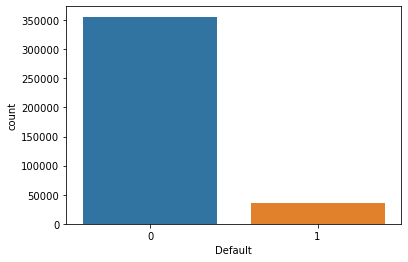

In [38]:
sns.countplot(acq_perf1["Default"])
# 9% of defaulters are in given dataset

In [39]:
# identifying the unique levels of a given data
acq_perf1.nunique() # number of unique levels for each columns

LoanID            391200
Channel                3
SellerName            14
OrInterestRate       528
OrUnpaidPrinc        649
OrLoanTerm           140
OrLTV                 97
OrCLTV               120
NumBorrow              9
DTIRat                64
CreditScore          386
FTHomeBuyer            3
LoanPurpose            3
PropertyType           5
NumUnits               4
OccStatus              3
PropertyState         54
Zip                  893
MortInsPerc           18
ProductType            1
CoCreditScore        359
MortInsType            2
RelMortInd             2
Default                2
dtype: int64

In [40]:
# produce the counts for product type variable
acq_perf1["ProductType"].value_counts()

FRM    391200
Name: ProductType, dtype: int64

In [41]:
# idenfitying the defaulter for the product of FRM--- Fixed rate mortgage

In [42]:
# product type is having only one unique level for all records so that we are dropping product type variable
acq_perf1.drop(["ProductType"],axis=1,inplace=True)

In [43]:
acq_perf1.shape

(391200, 23)

In [44]:
acq_perf1.columns

Index(['LoanID', 'Channel', 'SellerName', 'OrInterestRate', 'OrUnpaidPrinc',
       'OrLoanTerm', 'OrLTV', 'OrCLTV', 'NumBorrow', 'DTIRat', 'CreditScore',
       'FTHomeBuyer', 'LoanPurpose', 'PropertyType', 'NumUnits', 'OccStatus',
       'PropertyState', 'Zip', 'MortInsPerc', 'CoCreditScore', 'MortInsType',
       'RelMortInd', 'Default'],
      dtype='object')

In [45]:
# drop the PII(personal identification information) should not use in the analysis
acq_perf1.drop(["LoanID","PropertyState","Zip"],axis=1,inplace=True)

In [46]:
acq_perf1.columns

Index(['Channel', 'SellerName', 'OrInterestRate', 'OrUnpaidPrinc',
       'OrLoanTerm', 'OrLTV', 'OrCLTV', 'NumBorrow', 'DTIRat', 'CreditScore',
       'FTHomeBuyer', 'LoanPurpose', 'PropertyType', 'NumUnits', 'OccStatus',
       'MortInsPerc', 'CoCreditScore', 'MortInsType', 'RelMortInd', 'Default'],
      dtype='object')

# Is there any customers who have taken real estate loan???


In [47]:
acq_perf1["RelMortInd"].value_counts()/len(acq_perf1)*100

N    99.520194
Y     0.479806
Name: RelMortInd, dtype: float64

# 0.5% of total customers which are real estimate, we can not perfrom same analysis for business loans and resedentail loans we have to drop real estimate loans


In [48]:
pd.crosstab(acq_perf1["RelMortInd"],acq_perf1["Default"])

Default,0,1
RelMortInd,,
N,354179,35144
Y,1797,80


# defaulters are not same for resedential customers and business customers, if we keep business customer into indivdiual customers data it may cause bias ness so model may not be stable


# defaulter rate for individual customers --- 9%
# default rate for business customers ---- 4.26%

In [49]:
acq_perf2=acq_perf1[acq_perf1["RelMortInd"]=="N"].copy()
entity_cust=acq_perf1[acq_perf1["RelMortInd"]=="Y"].copy()
print(acq_perf2.shape,entity_cust.shape)

(389323, 20) (1877, 20)


In [50]:
acq_perf2.columns

Index(['Channel', 'SellerName', 'OrInterestRate', 'OrUnpaidPrinc',
       'OrLoanTerm', 'OrLTV', 'OrCLTV', 'NumBorrow', 'DTIRat', 'CreditScore',
       'FTHomeBuyer', 'LoanPurpose', 'PropertyType', 'NumUnits', 'OccStatus',
       'MortInsPerc', 'CoCreditScore', 'MortInsType', 'RelMortInd', 'Default'],
      dtype='object')

In [51]:
acq_perf2["RelMortInd"].value_counts()

N    389323
Name: RelMortInd, dtype: int64

In [52]:
acq_perf2.drop(["RelMortInd"],axis=1,inplace=True)

In [53]:
acq_perf2.columns

Index(['Channel', 'SellerName', 'OrInterestRate', 'OrUnpaidPrinc',
       'OrLoanTerm', 'OrLTV', 'OrCLTV', 'NumBorrow', 'DTIRat', 'CreditScore',
       'FTHomeBuyer', 'LoanPurpose', 'PropertyType', 'NumUnits', 'OccStatus',
       'MortInsPerc', 'CoCreditScore', 'MortInsType', 'Default'],
      dtype='object')

In [54]:
acq_perf2[acq_perf2['OrUnpaidPrinc']<=0]

,Channel,SellerName,OrInterestRate,OrUnpaidPrinc,OrLoanTerm,OrLTV,OrCLTV,NumBorrow,DTIRat,CreditScore,FTHomeBuyer,LoanPurpose,PropertyType,NumUnits,OccStatus,MortInsPerc,CoCreditScore,MortInsType,Default


In [55]:
acq_perf2["Channel"].value_counts()/len(acq_perf2)*100

C    42.622963
R    38.380471
B    18.996566
Name: Channel, dtype: float64

In [56]:
# R- nationalized banks-Govt banks for example : SBI, PNB
# C-corporate banks--private banks for example : HDFC,ICICI
# B- brokarage banks-3rd party-- directly bank does not exist-- LIC, bajaj finace

# almost 82% of loans are providing by national banks and private banks

In [57]:
pd.crosstab(acq_perf2["Channel"],acq_perf2["Default"])

Default,0,1
Channel,,
B,64142,9816
C,151858,14083
R,138179,11245


# insgihts: 13.2% of default rate for 3rd party loan provide almost all it is double to remaining defaulter

In [58]:
acq_perf2["SellerName"].value_counts()

BANK OF AMERICA, N.A.                        111546
OTHER                                         58448
JPMORGAN CHASE BANK, NATIONAL ASSOCIATION     39196
CITIMORTGAGE, INC.                            36649
WELLS FARGO BANK, N.A.                        29121
PNC BANK, N.A.                                27358
GMAC MORTGAGE, LLC                            22390
SUNTRUST MORTGAGE INC.                        15948
FLAGSTAR CAPITAL MARKETS CORPORATION          13248
AMTRUST BANK                                  11040
FDIC, RECEIVER, INDYMAC FEDERAL BANK FSB       9328
FIRST TENNESSEE BANK NATIONAL ASSOCIATION      7684
CHASE HOME FINANCE, LLC                        6830
HSBC BANK USA, NATIONAL ASSOCIATION             537
Name: SellerName, dtype: int64

In [59]:
pd.crosstab(acq_perf2["SellerName"],acq_perf2["Channel"])

Channel,B,C,R
SellerName,,,
AMTRUST BANK,3580,7366,94
"BANK OF AMERICA, N.A.",14131,62538,34877
"CHASE HOME FINANCE, LLC",3535,483,2812
"CITIMORTGAGE, INC.",4575,27337,4737
"FDIC, RECEIVER, INDYMAC FEDERAL BANK FSB",5127,1718,2483
FIRST TENNESSEE BANK NATIONAL ASSOCIATION,3332,7,4345
FLAGSTAR CAPITAL MARKETS CORPORATION,6241,5893,1114
"GMAC MORTGAGE, LLC",539,14183,7668
"HSBC BANK USA, NATIONAL ASSOCIATION",272,36,229


In [60]:
sell_count=acq_perf2[["SellerName","Default"]].groupby(["SellerName","Default"]).size()

In [61]:
sell_percent=sell_count.groupby(level=[0]).apply(lambda x:x/x.sum()).reset_index()

In [62]:
sell_percent[sell_percent["Default"]==1]

,SellerName,Default,0
1,AMTRUST BANK,1,0.090217
3,"BANK OF AMERICA, N.A.",1,0.110959
5,"CHASE HOME FINANCE, LLC",1,0.089605
7,"CITIMORTGAGE, INC.",1,0.088324
9,"FDIC, RECEIVER, INDYMAC FEDERAL BANK FSB",1,0.174636
11,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,1,0.080817
13,FLAGSTAR CAPITAL MARKETS CORPORATION,1,0.109601
15,"GMAC MORTGAGE, LLC",1,0.095266
17,"HSBC BANK USA, NATIONAL ASSOCIATION",1,0.011173
19,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",1,0.062047


# seller name : FDIC, RECEIVER, INDYMAC FEDERAL BANK FSB	 17% of customers are becoming defaulter

In [63]:
acq_perf2.columns

Index(['Channel', 'SellerName', 'OrInterestRate', 'OrUnpaidPrinc',
       'OrLoanTerm', 'OrLTV', 'OrCLTV', 'NumBorrow', 'DTIRat', 'CreditScore',
       'FTHomeBuyer', 'LoanPurpose', 'PropertyType', 'NumUnits', 'OccStatus',
       'MortInsPerc', 'CoCreditScore', 'MortInsType', 'Default'],
      dtype='object')

In [64]:
acq_perf2["NumBorrow"].value_counts()/len(acq_perf2)*100

2.0     51.131580
1.0     48.324142
3.0      0.408658
4.0      0.130740
6.0      0.001541
5.0      0.001027
7.0      0.000257
10.0     0.000257
8.0      0.000257
Name: NumBorrow, dtype: float64

# insights: 99% of customers are having maximum of two loans out that 48.3% customers are having only one loan and 51.13% of customers are having two loans

In [65]:
borr_count=acq_perf2[["NumBorrow","Default"]].groupby(["NumBorrow","Default"]).size()
borr_count

NumBorrow  Default
1.0        0          166790
           1           21347
2.0        0          185408
           1           13659
3.0        0            1485
           1             106
4.0        0             479
           1              30
5.0        0               3
           1               1
6.0        0               6
7.0        0               1
8.0        0               1
10.0       0               1
dtype: int64

In [66]:
borr_percent=borr_count.groupby(level=[0]).apply(lambda x:x/x.sum()).reset_index()
borr_percent[borr_percent["Default"]==1]

,NumBorrow,Default,0
1,1.0,1,0.113465
3,2.0,1,0.068615
5,3.0,1,0.066625
7,4.0,1,0.058939
9,5.0,1,0.250000


# Insights: 11% customers of defaulters are coming one loan id customers and more than 4 loans there are highly likely chance to become defaulter

In [67]:
pd.pivot_table(index="NumBorrow",aggfunc={"OrUnpaidPrinc":np.sum,"NumBorrow":len},data=acq_perf2)

,NumBorrow,OrUnpaidPrinc
NumBorrow,,
1.0,188137.0,33891591000
2.0,199067.0,42328354000
3.0,1591.0,387853000
4.0,509.0,126786000
5.0,4.0,1116000
6.0,6.0,2122000
7.0,1.0,83000
8.0,1.0,356000
10.0,1.0,351000


In [68]:
pd.pivot_table(index="NumBorrow",columns="Default",aggfunc={"OrUnpaidPrinc":np.sum,"NumBorrow":len},data=acq_perf2,fill_value=0)

NumBorrow        OrUnpaidPrinc            
Default           0      1             0           1
NumBorrow                                           
1.0          166790  21347   29938893000  3952698000
2.0          185408  13659   39316525000  3011829000
3.0            1485    106     359310000    28543000
4.0             479     30     118604000     8182000
5.0               3      1        949000      167000
6.0               6      0       2122000           0
7.0               1      0         83000           0
8.0               1      0        356000           0
10.0              1      0        351000           0

# 1 loan id customers default customers are high unpaid amount compared to other loan ids

In [69]:
acq_perf2.shape

(389323, 19)

In [70]:
acq_perf2.columns

Index(['Channel', 'SellerName', 'OrInterestRate', 'OrUnpaidPrinc',
       'OrLoanTerm', 'OrLTV', 'OrCLTV', 'NumBorrow', 'DTIRat', 'CreditScore',
       'FTHomeBuyer', 'LoanPurpose', 'PropertyType', 'NumUnits', 'OccStatus',
       'MortInsPerc', 'CoCreditScore', 'MortInsType', 'Default'],
      dtype='object')

# is there any missing values in given data

In [71]:
miss_identify=lambda x:x.isnull().sum()/len(x)*100

In [72]:
miss_identify(acq_perf2)

Channel            0.000000
SellerName         0.000000
OrInterestRate     0.000257
OrUnpaidPrinc      0.000000
OrLoanTerm         0.000000
OrLTV              0.000000
OrCLTV             0.008219
NumBorrow          0.001541
DTIRat             2.902474
CreditScore        0.129969
FTHomeBuyer        0.000000
LoanPurpose        0.000000
PropertyType       0.000000
NumUnits           0.000000
OccStatus          0.000000
MortInsPerc       78.331617
CoCreditScore     60.048340
MortInsType       78.331617
Default            0.000000
dtype: float64

In [92]:
def numerical_summary(data):
    abc=data.describe().T
    abc["unique_Records"]=data.nunique()
    abc["skew"]=data.skew()
    abc["Missing%"]=(len(data)-abc["count"])/len(data)*100
    abc["lo"]=data.quantile(0.25)-(1.5*(data.quantile(0.75)-data.quantile(0.25)))
    abc["uo"]=data.quantile(0.75)+(1.5*(data.quantile(0.75)-data.quantile(0.25)))
    abc1=abc[["count","unique_Records","min","25%","50%","mean","75%","max","std","Missing%","skew","lo","uo"]]
    abc1.to_csv("C:\\Users\\Koti\\Desktop\\data\\DVS\\DVS_NOV_WKND\\final_project\\summary_stat.csv")
    return abc1

In [93]:
numerical_summary(data=acq_perf2)

,count,unique_Records,min,25%,50%,mean,75%,max,std,Missing%,skew,lo,uo
OrInterestRate,389322.0,514,3.97,6.25,6.5,6.483363,6.75,9.375,0.387006,0.000257,0.476013,5.5,7.5
OrUnpaidPrinc,389323.0,649,8000.00,119000.00,180000.0,197112.446478,260000.00,802000.000,101486.224643,0.000000,0.677496,-92500.0,471500.0
OrLoanTerm,389323.0,140,60.00,360.00,360.0,338.653439,360.00,360.000,56.834982,0.000000,-2.444836,360.0,360.0
OrLTV,389323.0,97,1.00,64.00,78.0,72.148576,80.00,97.000,16.812060,0.000000,-1.104953,40.0,104.0
OrCLTV,389291.0,120,1.00,65.00,80.0,73.745178,87.00,143.000,17.116090,0.008219,-1.100709,32.0,120.0
NumBorrow,389317.0,9,1.00,1.00,2.0,1.523594,2.00,10.000,0.516007,0.001541,0.170501,-0.5,3.5
DTIRat,378023.0,64,1.00,30.00,39.0,38.678652,48.00,64.000,12.508204,2.902474,-0.105742,3.0,75.0
CreditScore,388817.0,386,392.00,673.00,725.0,720.094397,774.00,843.000,61.343348,0.129969,-0.389839,521.5,925.5
NumUnits,389323.0,4,1.00,1.00,1.0,1.042160,1.00,4.000,0.257737,0.000000,7.597839,1.0,1.0
MortInsPerc,84360.0,18,6.00,17.00,25.0,23.035005,25.00,39.000,6.483059,78.331617,-0.662646,5.0,37.0


In [94]:
acq_perf2["OrLoanTerm"].value_counts()

360    336960
180     31017
240     13302
120      3756
300      1910
        ...  
163         1
164         1
165         1
166         1
256         1
Name: OrLoanTerm, Length: 140, dtype: int64

In [140]:
abc=pd.DataFrame(acq_perf2["Channel"].value_counts()/len(acq_perf2)*100).reset_index()
abc

,index,Channel
0,C,42.622963
1,R,38.380471
2,B,18.996566


In [105]:
type(abc)

pandas.core.frame.DataFrame

In [108]:
abc1=abc.rename(columns={abc.columns[0]:"Channel",abc.columns[1]:"Channel_percent"})

In [109]:
abc1

,Channel,Channel_percent
0,C,42.622963
1,R,38.380471
2,B,18.996566


In [138]:
def char_summary(data):
    col=list(data.columns)
    for i in col:
        if data[i].dtypes=="object":
            abc=pd.DataFrame(data[i].value_counts()/len(data)*100).reset_index()
            abc1=abc.rename(columns={abc.columns[0]:i,abc.columns[1]:i+"_percent"})
           
            print(abc1)

In [142]:
char_summary(data=acq_perf2)

  Channel  Channel_percent
0       C        42.622963
1       R        38.380471
2       B        18.996566
                                   SellerName  SellerName_percent
0                       BANK OF AMERICA, N.A.           28.651274
1                                       OTHER           15.012727
2   JPMORGAN CHASE BANK, NATIONAL ASSOCIATION           10.067733
3                          CITIMORTGAGE, INC.            9.413520
4                      WELLS FARGO BANK, N.A.            7.479907
5                              PNC BANK, N.A.            7.027070
6                          GMAC MORTGAGE, LLC            5.751009
7                      SUNTRUST MORTGAGE INC.            4.096342
8        FLAGSTAR CAPITAL MARKETS CORPORATION            3.402830
9                                AMTRUST BANK            2.835692
10   FDIC, RECEIVER, INDYMAC FEDERAL BANK FSB            2.395954
11  FIRST TENNESSEE BANK NATIONAL ASSOCIATION            1.973683
12                    CHASE HOME F

In [143]:
acq_perf2.drop(["SellerName"],axis=1,inplace=True)

In [144]:
acq_perf2.shape

(389323, 18)

In [145]:
acq_perf3=pd.get_dummies(acq_perf2,drop_first=True) # here converting the categorical information into binary format

In [146]:
acq_perf3.shape

(389323, 25)

In [147]:
acq_perf3.head()

,OrInterestRate,OrUnpaidPrinc,OrLoanTerm,OrLTV,OrCLTV,NumBorrow,DTIRat,CreditScore,NumUnits,MortInsPerc,...,FTHomeBuyer_U,FTHomeBuyer_Y,LoanPurpose_P,LoanPurpose_R,PropertyType_CP,PropertyType_MH,PropertyType_PU,PropertyType_SF,OccStatus_P,OccStatus_S
0,6.625,343000,360,86,86.0,2.0,27.0,751.0,1,25.0,...,0,0,0,0,0,0,1,0,1,0
1,6.250,400000,360,62,62.0,2.0,35.0,804.0,1,NaN,...,0,0,1,0,0,0,0,1,1,0
2,6.625,81000,360,64,82.0,1.0,53.0,585.0,1,NaN,...,0,0,0,1,0,0,0,1,1,0
3,6.500,119000,360,71,71.0,1.0,35.0,646.0,1,NaN,...,0,0,0,1,0,0,0,0,1,0
4,6.625,205000,360,27,27.0,1.0,54.0,591.0,1,NaN,...,0,0,0,0,0,0,0,1,1,0


# treating the missing value with the help of machine learning algorithms
1. We can not same algorithm for different indepdent variables
2. here in this case algorithm is building each variable 
3. so we need to have different variables we have different variables
for example we would like to apply linear regression for all the variables as per assumptions it does not accept the cateogrical variables
vice versa for classificaiton
so we need to different models for the corrsponding variables

In [149]:
from sklearn.linear_model import LinearRegression  # this will help us to impute the numerical varaible missing values
from sklearn.linear_model import LogisticRegression # this will help us to impute the categorical varaible missing values
def fillnan(df):
    columns = df.columns[df.isnull().any()]
    for name in columns:
        y = df.loc[df[name].notnull(), name].values # the varaibles, which are having missing but consider only non missing rows of missing variables
        X = df.loc[df[name].notnull()].drop(columns, axis=1).values # non missing variables values are considering
        X_test = df.loc[df[name].isnull()].drop(columns, axis=1).values # missing rows 
        if df[name].dtypes == 'object':
            model = LogisticRegression()
            model.fit(X, y)
            df.loc[df[name].isnull(), name] = model.predict(X_test)
        else:
            model = LinearRegression()
            model.fit(X, y)
            df.loc[df[name].isnull(), name] = model.predict(X_test)
    return df

In [150]:
acq_perf4=fillnan(df=acq_perf3)

In [151]:
acq_perf4.isnull().sum()

OrInterestRate     0
OrUnpaidPrinc      0
OrLoanTerm         0
OrLTV              0
OrCLTV             0
NumBorrow          0
DTIRat             0
CreditScore        0
NumUnits           0
MortInsPerc        0
CoCreditScore      0
MortInsType        0
Default            0
Channel_C          0
Channel_R          0
FTHomeBuyer_U      0
FTHomeBuyer_Y      0
LoanPurpose_P      0
LoanPurpose_R      0
PropertyType_CP    0
PropertyType_MH    0
PropertyType_PU    0
PropertyType_SF    0
OccStatus_P        0
OccStatus_S        0
dtype: int64

# outliers (extreme values of a given variable)
1. there are two kinds of outliers

 . Lower outliers ---- Q1-1.5*IQR
 
 . Upper outliers -----Q3+1.5*IQR

In [159]:
def outlier_detection(df):
    col=list(df.columns)
    for i in col:
        if df[i].dtypes!="object":
            if df[i].nunique()>5:
                iqr=df[i].quantile(0.75)-df[i].quantile(0.25)
                lo=df[i].quantile(0.25)-1.5*iqr
                uo=df[i].quantile(0.75)+1.5*iqr
                print("lower cut off value",lo)
                print("min  of ",i,"value",df[i].min())
                print("\n")
                print("upper cut off value",uo)
                print("max  of ",i,"value",df[i].max())
                print("\n")
            
    

In [160]:
outlier_detection(df=acq_perf4)

lower cut off value 5.5
min  of  OrInterestRate value 3.97


upper cut off value 7.5
max  of  OrInterestRate value 9.375


lower cut off value -92500.0
min  of  OrUnpaidPrinc value 8000


upper cut off value 471500.0
max  of  OrUnpaidPrinc value 802000


lower cut off value 360.0
min  of  OrLoanTerm value 60


upper cut off value 360.0
max  of  OrLoanTerm value 360


lower cut off value 40.0
min  of  OrLTV value 1


upper cut off value 104.0
max  of  OrLTV value 97


lower cut off value 32.0
min  of  OrCLTV value 1.0


upper cut off value 120.0
max  of  OrCLTV value 143.0


lower cut off value -0.5
min  of  NumBorrow value 1.0


upper cut off value 3.5
max  of  NumBorrow value 10.0


lower cut off value 3.0
min  of  DTIRat value 1.0


upper cut off value 75.0
max  of  DTIRat value 64.0


lower cut off value 521.5
min  of  CreditScore value 392.0


upper cut off value 925.5
max  of  CreditScore value 843.0


lower cut off value -44.88160528215847
min  of  MortInsPerc value -103.09772213

# identified outliers

    1.  MortInsType - cut off value is 1.23  but our data max value 2
    2. CoCreditScore -- cut off value is 822.7080 but our data max value is 844
    3. MortInsPerc -- lower side cut off value is -44.88160528215847 but our data min value is -103.09772213399977
    4. OrCLTV ---- upper side cut off value is 120 but our data max value is 143
    5. OrUnpaidPrinc---- upper side cut off values are 471500 but our data max value is 802000
    6.OrInterestRate --- upper side cut off values are 7.5 but our data max value is 9.35
    6.OrInterestRate ---- lower side cut off values are 5.5 but our dat min value is 3.97

In [163]:
acq_perf4["MortInsType"]=np.where(acq_perf4["MortInsType"]>1.23,1.23,acq_perf4["MortInsType"])
acq_perf4["CoCreditScore"]=np.where(acq_perf4["CoCreditScore"]>822.7,822.7,acq_perf4["CoCreditScore"])
acq_perf4["MortInsPerc"]=np.where(acq_perf4["MortInsPerc"]<-44.88,-44.88,acq_perf4["MortInsPerc"])
acq_perf4["OrCLTV"]=np.where(acq_perf4["OrCLTV"]>120,120,acq_perf4["OrCLTV"])
acq_perf4["OrUnpaidPrinc"]=np.where(acq_perf4["OrUnpaidPrinc"]>471500,471500,acq_perf4["OrUnpaidPrinc"])
acq_perf4["OrInterestRate"]=np.where(acq_perf4["OrInterestRate"]>7.5,7.5,acq_perf4["OrInterestRate"])
acq_perf4["OrInterestRate"]=np.where(acq_perf4["OrInterestRate"]<5.5,5.5,acq_perf4["OrInterestRate"])

# check is indepdent variables are normally distributed?

In [164]:
acq_perf4.skew()

OrInterestRate      0.370896
OrUnpaidPrinc       0.615532
OrLoanTerm         -2.444836
OrLTV              -1.104953
OrCLTV             -1.101351
NumBorrow           0.170500
DTIRat             -0.108849
CreditScore        -0.390598
NumUnits            7.597839
MortInsPerc        -0.717462
CoCreditScore      -0.527518
MortInsType        -0.453546
Default             2.859585
Channel_C           0.298348
Channel_R           0.477866
FTHomeBuyer_U      32.978022
FTHomeBuyer_Y       2.617808
LoanPurpose_P       0.489177
LoanPurpose_R       1.518624
PropertyType_CP    13.177665
PropertyType_MH     9.819849
PropertyType_PU     1.952425
PropertyType_SF    -1.112970
OccStatus_P        -2.079331
OccStatus_S         4.288794
dtype: float64

In [165]:
acq_perf4.shape

(389323, 25)

# Hypothesis testing:

# OrUnpaidPrinc

1. H0: average OrUnpaidPrinc is same for both defaulters and non defaulters----(null hypothesis) -- reject the null hypothesis
2. Ha: average OrUnpaidPrinc is not same for both defaulters and non defaulters(alternative hypothesis)
    
if p>0.05,that means there is no strong evidence to reject the null hypothesis-- OrUnpaidPrinc is not influnce the defaulter

In [167]:
from scipy.stats import ttest_ind
ttest_ind(acq_perf4[acq_perf4["Default"]==0]["OrUnpaidPrinc"],acq_perf4[acq_perf4["Default"]==1]["OrUnpaidPrinc"])

Ttest_indResult(statistic=-4.41512706651976, pvalue=1.0097779229290168e-05)

In [173]:
abc=ttest_ind(acq_perf4[acq_perf4["Default"]==0]["OrUnpaidPrinc"],acq_perf4[acq_perf4["Default"]==1]["OrUnpaidPrinc"])[1]
abc

1.0097779229290168e-05

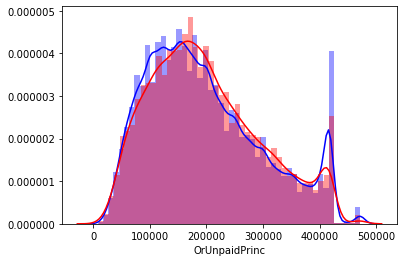

In [169]:
sns.distplot(acq_perf4[acq_perf4["Default"]==0]["OrUnpaidPrinc"],color="b")
sns.distplot(acq_perf4[acq_perf4["Default"]==1]["OrUnpaidPrinc"],color="r")

# 4.4 times of non defaulter OrUnpaidPrinc amount is higher compared defaulter


In [181]:
def influnce_check(data,depdent_col):
    col=list(data.columns)
    for i in col:
        if data[i].dtypes!="object":
            if data[i].nunique()>5:
                from scipy.stats import ttest_ind
                abc_p=ttest_ind(data[data[depdent_col]==0][i],data[data[depdent_col]==1][i])[1]
                abc_s=ttest_ind(data[data[depdent_col]==0][i],data[data[depdent_col]==1][i])[0]
                print("importance",i,"values are",abc_p)
                print("static",i,"values are",abc_s)
                print("\n")
            

In [182]:
influnce_check(data=acq_perf4,depdent_col="Default")

importance OrInterestRate values are 0.0
static OrInterestRate values are -87.2241040126063


importance OrUnpaidPrinc values are 1.0097779229290168e-05
static OrUnpaidPrinc values are -4.41512706651976


importance OrLoanTerm values are 0.0
static OrLoanTerm values are -52.9478297702962


importance OrLTV values are 0.0
static OrLTV values are -95.63967634022393


importance OrCLTV values are 0.0
static OrCLTV values are -89.81055573066422


importance NumBorrow values are 0.0
static NumBorrow values are 48.219954678952135


importance DTIRat values are 0.0
static DTIRat values are -56.369118434918974


importance CreditScore values are 0.0
static CreditScore values are 95.52324407549358


importance MortInsPerc values are 0.0
static MortInsPerc values are -106.36160639630168


importance CoCreditScore values are 0.0
static CoCreditScore values are 157.0159499248826


importance MortInsType values are 0.0
static MortInsType values are -61.952732403806266




In [183]:
acq_perf4.shape

(389323, 25)

# EDA-Exploratary Data analysis

1. we need to identify the reasons for default

In [185]:
acq_perf4.columns

Index(['OrInterestRate', 'OrUnpaidPrinc', 'OrLoanTerm', 'OrLTV', 'OrCLTV',
       'NumBorrow', 'DTIRat', 'CreditScore', 'NumUnits', 'MortInsPerc',
       'CoCreditScore', 'MortInsType', 'Default', 'Channel_C', 'Channel_R',
       'FTHomeBuyer_U', 'FTHomeBuyer_Y', 'LoanPurpose_P', 'LoanPurpose_R',
       'PropertyType_CP', 'PropertyType_MH', 'PropertyType_PU',
       'PropertyType_SF', 'OccStatus_P', 'OccStatus_S'],
      dtype='object')

In [188]:
abc=pd.qcut(acq_perf4["OrUnpaidPrinc"],q=4)

In [189]:
len(abc)

389323

In [192]:
pd.crosstab(pd.qcut(acq_perf4["OrUnpaidPrinc"],q=[0,0.25,0.5,0.75,1]),acq_perf4["Default"])

Default,0,1
OrUnpaidPrinc,,
"(7999.999, 119000.0]",89743,8028
"(119000.0, 180000.0]",91373,8964
"(180000.0, 260000.0]",86108,9353
"(260000.0, 471500.0]",86955,8799


In [197]:
pd.crosstab(pd.qcut(acq_perf4["OrUnpaidPrinc"],q=4),acq_perf4["Default"])

Default,0,1
OrUnpaidPrinc,,
"(7999.999, 119000.0]",89743,8028
"(119000.0, 180000.0]",91373,8964
"(180000.0, 260000.0]",86108,9353
"(260000.0, 471500.0]",86955,8799


# most of defaulter  are having unpaid principal amout is in range of 180000-260000

In [198]:
pd.crosstab(pd.qcut(acq_perf4["OrInterestRate"],q=4),acq_perf4["Default"])

Default,0,1
OrInterestRate,,
"(5.499, 6.25]",114563,6256
"(6.25, 6.5]",118381,10342
"(6.5, 6.75]",66429,7763
"(6.75, 7.5]",54806,10783


# OrInterestRate: if interest rate >6.75 there more 16.5% chances customers is going to become defaulter

In [200]:
pd.crosstab(pd.qcut(acq_perf4["DTIRat"],q=4),acq_perf4["Default"])

Default,0,1
DTIRat,,
"(0.999, 30.0]",96703,5468
"(30.0, 39.0]",91004,7920
"(39.0, 48.0]",88184,11099
"(48.0, 64.0]",78288,10657


# DTI ratio : if dti ratio is more than 40% there are 12% of customer are highly likely chances to become defaulter

In [202]:
pd.crosstab(acq_perf2["FTHomeBuyer"],acq_perf2["Default"])

Default,0,1
FTHomeBuyer,,
N,316801,32187
U,304,53
Y,37074,2904


# if customer is having more properites there are highly likely chance to become defaulter--- the default rate is 15%

In [203]:
acq_perf4.columns

Index(['OrInterestRate', 'OrUnpaidPrinc', 'OrLoanTerm', 'OrLTV', 'OrCLTV',
       'NumBorrow', 'DTIRat', 'CreditScore', 'NumUnits', 'MortInsPerc',
       'CoCreditScore', 'MortInsType', 'Default', 'Channel_C', 'Channel_R',
       'FTHomeBuyer_U', 'FTHomeBuyer_Y', 'LoanPurpose_P', 'LoanPurpose_R',
       'PropertyType_CP', 'PropertyType_MH', 'PropertyType_PU',
       'PropertyType_SF', 'OccStatus_P', 'OccStatus_S'],
      dtype='object')

In [204]:
sample=acq_perf4[['OrInterestRate', 'OrUnpaidPrinc','OrLTV','DTIRat','MortInsPerc']]

In [205]:
sample.head()

,OrInterestRate,OrUnpaidPrinc,OrLTV,DTIRat,MortInsPerc
0,6.625,343000,86,27.0,25.000000
1,6.250,400000,62,35.0,-14.825609
2,6.625,81000,64,53.0,-10.766463
3,6.500,119000,71,35.0,-1.551262
4,6.625,205000,27,54.0,-44.880000


In [209]:
# to make all variables into same units , we have to use minmax scalar
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
sample1=pd.DataFrame(mn.fit_transform(sample),columns=sample.columns)

In [210]:
sample1.head()

,OrInterestRate,OrUnpaidPrinc,OrLTV,DTIRat,MortInsPerc
0,0.5625,0.722762,0.885417,0.412698,0.833095
1,0.3750,0.845739,0.635417,0.539683,0.358302
2,0.5625,0.157497,0.656250,0.825397,0.406695
3,0.5000,0.239482,0.729167,0.539683,0.516556
4,0.5625,0.425027,0.270833,0.841270,0.000000


In [211]:
# divide the data into segments to draw patterns of a data, we are going to apply clustering algoritham


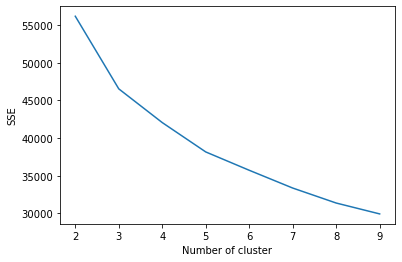

In [213]:
import matplotlib.pyplot as plt
sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(sample1)
    sample1["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [215]:
sample1.drop(["clusters"],axis=1,inplace=True)

In [216]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km.fit(sample1)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [217]:
km.labels_

array([2, 2, 0, ..., 1, 2, 1])

In [218]:
sample1["cluster"]=km.labels_

In [219]:
sample1["cluster"].value_counts()

0    186574
2    113871
1     88878
Name: cluster, dtype: int64

In [220]:
acq_perf4["cluster"]=km.labels_

In [221]:
acq_perf4["cluster"].value_counts()

0    186574
2    113871
1     88878
Name: cluster, dtype: int64

In [238]:
seg_data_0=acq_perf4[acq_perf4["cluster"]==0].copy()
seg_data_1=acq_perf4[acq_perf4["cluster"]==1].copy()
seg_data_2=acq_perf4[acq_perf4["cluster"]==2].copy()
print(seg_data_0.shape,seg_data_1.shape,seg_data_2.shape)

(186574, 26) (88878, 26) (113871, 26)


In [223]:
sample.head()

,OrInterestRate,OrUnpaidPrinc,OrLTV,DTIRat,MortInsPerc
0,6.625,343000,86,27.0,25.000000
1,6.250,400000,62,35.0,-14.825609
2,6.625,81000,64,53.0,-10.766463
3,6.500,119000,71,35.0,-1.551262
4,6.625,205000,27,54.0,-44.880000


In [224]:
sample["cluster"]=km.labels_

C:\Users\Koti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [225]:
sample["cluster"].value_counts()

0    186574
2    113871
1     88878
Name: cluster, dtype: int64

In [228]:
abc_0=sample[sample["cluster"]==0]
abc_1=sample[sample["cluster"]==1]

In [227]:
abc_0.head()

,OrInterestRate,OrUnpaidPrinc,OrLTV,DTIRat,MortInsPerc,cluster
2,6.625,81000,64,53.0,-10.766463,0
3,6.500,119000,71,35.0,-1.551262,0
5,6.375,210000,80,42.0,8.770598,0
6,6.750,172000,95,42.0,30.000000,0
7,6.875,108000,90,51.0,25.000000,0


In [229]:
abc_0.min()

OrInterestRate       5.500000
OrUnpaidPrinc     8000.000000
OrLTV                9.000000
DTIRat               1.000000
MortInsPerc        -18.944653
cluster              0.000000
dtype: float64

In [230]:
abc_0.max()

OrInterestRate         7.5
OrUnpaidPrinc     351000.0
OrLTV                 97.0
DTIRat                64.0
MortInsPerc           38.0
cluster                0.0
dtype: float64

# group0: 5.5 <=OrInterestRate <=7.5 and 8000<=OrUnpaidPrinc <=351000.0 and 9<=OrLTV<=97.0 and 1<=DTIRAT<=64 and 18<=MortInsPerc<=38

In [233]:
abc_1.min()

OrInterestRate       5.50
OrUnpaidPrinc     8000.00
OrLTV                1.00
DTIRat               1.00
MortInsPerc        -44.88
cluster              1.00
dtype: float64

In [234]:
abc_1.max()

OrInterestRate         7.5
OrUnpaidPrinc     471500.0
OrLTV                 75.0
DTIRat                64.0
MortInsPerc           20.0
cluster                1.0
dtype: float64

# group1: 5.5 <=OrInterestRate <=7.5 and 8000<=OrUnpaidPrinc <=471500.0 and 1<=OrLTV<=75.0 and 1<=DTIRAT<=64 and -44<=MortInsPerc<=20

In [235]:
seg_data_0.shape

(186574, 26)

In [236]:
seg_data_0.columns

Index(['OrInterestRate', 'OrUnpaidPrinc', 'OrLoanTerm', 'OrLTV', 'OrCLTV',
       'NumBorrow', 'DTIRat', 'CreditScore', 'NumUnits', 'MortInsPerc',
       'CoCreditScore', 'MortInsType', 'Default', 'Channel_C', 'Channel_R',
       'FTHomeBuyer_U', 'FTHomeBuyer_Y', 'LoanPurpose_P', 'LoanPurpose_R',
       'PropertyType_CP', 'PropertyType_MH', 'PropertyType_PU',
       'PropertyType_SF', 'OccStatus_P', 'OccStatus_S', 'cluster'],
      dtype='object')

In [239]:
seg_data_0.drop(["cluster"],axis=1,inplace=True)

In [240]:
seg_data_0.shape

(186574, 25)

In [242]:
seg_data_0["Default"].value_counts()/len(seg_data_0)*100

0    88.2154
1    11.7846
Name: Default, dtype: float64

In [243]:
seg_data_1["Default"].value_counts()/len(seg_data_1)*100

0    97.38968
1     2.61032
Name: Default, dtype: float64

In [244]:
seg_data_2["Default"].value_counts()/len(seg_data_2)*100

0    90.483091
1     9.516909
Name: Default, dtype: float64

In [245]:
seg_data_0.shape

(186574, 25)

In [246]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(seg_data_0,test_size=0.2,random_state=0)
print(train.shape,test.shape)

(149259, 25) (37315, 25)


In [247]:
x_train=train.drop(["Default"],axis=1)
y_train=train["Default"]
x_test=test.drop(["Default"],axis=1)
y_test=test["Default"]

# Generally follow the variable reduction method for classification algorithms:

1. informatio  gain/Gini

2. Pairwaise correlation

3. VIF
4. P-value

In [248]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [249]:
dt.feature_importances_

array([2.16303091e-02, 5.18389815e-02, 2.92623445e-03, 2.60347330e-02,
       1.19411580e-02, 1.93083941e-01, 3.08593744e-02, 4.15219176e-02,
       1.90707914e-03, 1.14396321e-01, 2.84009403e-01, 2.85322807e-02,
       5.54055137e-03, 9.71846361e-03, 1.24145753e-03, 1.64785473e-02,
       9.90107182e-02, 1.71853996e-02, 1.24299149e-04, 4.16041137e-04,
       5.96567250e-03, 8.78559273e-03, 2.49764882e-02, 1.87503631e-03])

In [260]:
abc=pd.DataFrame(list(zip(x_train.columns,dt.feature_importances_)),columns=["var","imp"])

In [261]:
type(abc)

pandas.core.frame.DataFrame

In [278]:
abc1=abc[abc["imp"]>0.005].reset_index().drop(["index"],axis=1)

In [279]:
abc1.shape

(18, 2)

In [284]:
abc1.head()

,var,imp
0,OrInterestRate,0.021630
1,OrUnpaidPrinc,0.051839
2,OrLTV,0.026035
3,OrCLTV,0.011941
4,NumBorrow,0.193084


In [289]:
x_train1=x_train[list(abc1["var"])]

In [290]:
x_train1.shape

(149259, 18)

In [311]:
def pairwise_correlaiton(data,depdendent_col):
    col=list(data.columns)
    for i in col:
        abc=abs(np.corrcoef(data[i],depdendent_col)[0][1])
        if abc>0.02:
            print(i)            

In [312]:
abc2=pairwise_correlaiton(data=x_train1,depdendent_col=y_train)

OrInterestRate
OrUnpaidPrinc
OrLTV
OrCLTV
NumBorrow
DTIRat
CreditScore
MortInsPerc
CoCreditScore
MortInsType
Channel_R
FTHomeBuyer_Y
LoanPurpose_P
LoanPurpose_R
OccStatus_P


In [328]:
x_train2=x_train1[["OrInterestRate",
"OrUnpaidPrinc",
"OrLTV",
"OrCLTV",
"NumBorrow",
"DTIRat",
"CreditScore",
"MortInsPerc",
"CoCreditScore",
"MortInsType",
"Channel_R",
"FTHomeBuyer_Y",
"LoanPurpose_P",
"LoanPurpose_R",
"OccStatus_P"
]]

In [329]:
x_train2.shape

(149259, 15)

In [330]:
# apply VIF method to drop the variables

In [333]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.copy()
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [334]:
vif_cal(input_data=x_train2,dependent_col=y_train)

OrInterestRate  VIF =  1.26
OrUnpaidPrinc  VIF =  1.17
OrLTV  VIF =  15.93
OrCLTV  VIF =  5.75
NumBorrow  VIF =  1.05
DTIRat  VIF =  1.04
CreditScore  VIF =  1.45
MortInsPerc  VIF =  11.56
CoCreditScore  VIF =  1.64
MortInsType  VIF =  1.57
Channel_R  VIF =  1.04
FTHomeBuyer_Y  VIF =  1.38
LoanPurpose_P  VIF =  2.73
LoanPurpose_R  VIF =  1.38
OccStatus_P  VIF =  1.48


In [335]:
x_train2.drop(["OrLTV"],axis=1,inplace=True)

C:\Users\Koti\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [336]:
vif_cal(input_data=x_train2,dependent_col=y_train)

OrInterestRate  VIF =  1.25
OrUnpaidPrinc  VIF =  1.17
OrCLTV  VIF =  4.26
NumBorrow  VIF =  1.05
DTIRat  VIF =  1.04
CreditScore  VIF =  1.45
MortInsPerc  VIF =  4.07
CoCreditScore  VIF =  1.64
MortInsType  VIF =  1.54
Channel_R  VIF =  1.03
FTHomeBuyer_Y  VIF =  1.38
LoanPurpose_P  VIF =  2.72
LoanPurpose_R  VIF =  1.37
OccStatus_P  VIF =  1.45


In [337]:
x_train2.drop(["OrCLTV"],axis=1,inplace=True)

In [338]:
vif_cal(input_data=x_train2,dependent_col=y_train)

OrInterestRate  VIF =  1.25
OrUnpaidPrinc  VIF =  1.17
NumBorrow  VIF =  1.05
DTIRat  VIF =  1.04
CreditScore  VIF =  1.44
MortInsPerc  VIF =  1.2
CoCreditScore  VIF =  1.64
MortInsType  VIF =  1.54
Channel_R  VIF =  1.03
FTHomeBuyer_Y  VIF =  1.38
LoanPurpose_P  VIF =  2.62
LoanPurpose_R  VIF =  1.35
OccStatus_P  VIF =  1.4


In [339]:
x_train2.drop(["LoanPurpose_P"],axis=1,inplace=True)

In [340]:
vif_cal(input_data=x_train2,dependent_col=y_train)

OrInterestRate  VIF =  1.24
OrUnpaidPrinc  VIF =  1.16
NumBorrow  VIF =  1.05
DTIRat  VIF =  1.04
CreditScore  VIF =  1.44
MortInsPerc  VIF =  1.12
CoCreditScore  VIF =  1.51
MortInsType  VIF =  1.19
Channel_R  VIF =  1.03
FTHomeBuyer_Y  VIF =  1.18
LoanPurpose_R  VIF =  1.06
OccStatus_P  VIF =  1.38


In [341]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(solver="liblinear")
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [344]:
list(zip(x_train2.columns,lg.coef_[0]))

[('OrInterestRate', 0.005768063078491254),
 ('OrUnpaidPrinc', 5.211700797843085e-07),
 ('NumBorrow', 0.011856112221075167),
 ('DTIRat', 0.018215449807743006),
 ('CreditScore', 0.013640589137173455),
 ('MortInsPerc', -0.003973805768815007),
 ('CoCreditScore', 0.026475183699774564),
 ('MortInsType', -0.001183686188075198),
 ('Channel_R', 0.0007958624000171252),
 ('FTHomeBuyer_Y', -0.002468235575148787),
 ('LoanPurpose_R', -0.01285415731045168),
 ('OccStatus_P', 0.0004735523386061819)]

In [346]:
x_train3=x_train2.copy()
x_train3["default"]=y_train

In [348]:
import statsmodels.formula.api as sm
model=sm.logit(formula="default~OrInterestRate+OrUnpaidPrinc+NumBorrow+DTIRat+CreditScore+MortInsPerc+CoCreditScore+MortInsType+Channel_R+FTHomeBuyer_Y+LoanPurpose_R+OccStatus_P",data=x_train3).fit()
model.summary2()


Optimization terminated successfully.
         Current function value: 0.304586
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.158     
Dependent Variable: default          AIC:              90950.2887
Date:               2020-04-05 10:32 BIC:              91079.1634
No. Observations:   149259           Log-Likelihood:   -45462.   
Df Model:           12               LL-Null:          -54019.   
Df Residuals:       149246           LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept        15.8105   0.3396  46.5578 0.0000 15.1449 16.4761
OrInterestRate    0.4671   0.0254  18.3734 0.0000  0.4173  0.5169
OrUnpaidPrinc     0.0000   0.0000  22.7619 0.0000  0.0000  0.0000
NumBorrow        -1.1866   0.0220 -53.9057 0.0000 -1.2298 -1.1435
DTIRat            0.0148   0.0008  19.6299 0.0000  0.0134  0.0163
CreditScore      -0.0018   0.0002 -10.7991 0.0000 -0.0022 -0.0015
MortInsPerc       0.0198   0.0008  23.7106 0.0000  0.0181  0.0214
CoCreditScore    -0.0254   0.0003 -83.5713 0.0000 -0.0260 -0.0248
MortInsType      -0.4551   0.1309  -3.4765 0.0005 -0.7117 -0.1985
Channel_R        -0.2539   0.0184 -13.7733 0.0000 -0.2901 -0.2178
FTHomeBuyer_Y    -0.1498   0.0317  -4.7288 0.0000 -0.2119 -0.0877
LoanPurpose_R     0.1777   0.0207   8.5673 0.0000  0.1370  0.2183
OccStatus_P      -1.1362   0.0255 -44.5953 0.0000 -1.1861 -1.0863
=================================================================

"""

In [351]:
abs(model.tvalues)[1:]

OrInterestRate    18.373430
OrUnpaidPrinc     22.761860
NumBorrow         53.905663
DTIRat            19.629919
CreditScore       10.799097
MortInsPerc       23.710650
CoCreditScore     83.571306
MortInsType        3.476528
Channel_R         13.773287
FTHomeBuyer_Y      4.728809
LoanPurpose_R      8.567279
OccStatus_P       44.595268
dtype: float64

In [354]:
x_train3["pred"]=np.where(model.predict()>=0.5,1,0)

In [355]:
x_train3.head()

,OrInterestRate,OrUnpaidPrinc,NumBorrow,DTIRat,CreditScore,MortInsPerc,CoCreditScore,MortInsType,Channel_R,FTHomeBuyer_Y,LoanPurpose_R,OccStatus_P,default,pred
62954,6.375,148000,2.0,30.0,603.0,8.566629,589.000000,1.012632,0,0,0,1,0,0
33959,6.875,122000,2.0,50.0,702.0,10.678711,702.000000,1.024266,0,0,0,0,0,0
128744,6.750,133000,1.0,37.0,647.0,30.000000,696.095799,1.000000,0,0,0,1,1,0
53425,6.875,53000,1.0,41.0,805.0,9.722619,755.124617,0.990392,1,0,0,0,0,0
260687,6.125,208000,1.0,34.0,668.0,25.000000,707.610664,1.000000,1,0,1,1,0,0


In [356]:
x_train3["pred"].value_counts()

0    147159
1      2100
Name: pred, dtype: int64

In [358]:
pd.crosstab(pd.qcut(x_train3["OrUnpaidPrinc"],q=4),x_train3["pred"])

pred,0,1
OrUnpaidPrinc,,
"(7999.999, 105000.0]",36966,384
"(105000.0, 146000.0]",37434,370
"(146000.0, 184000.0]",36645,426
"(184000.0, 351000.0]",36114,920


In [361]:
x_train3.columns

Index(['OrInterestRate', 'OrUnpaidPrinc', 'NumBorrow', 'DTIRat', 'CreditScore',
       'MortInsPerc', 'CoCreditScore', 'MortInsType', 'Channel_R',
       'FTHomeBuyer_Y', 'LoanPurpose_R', 'OccStatus_P', 'default', 'pred'],
      dtype='object')

In [363]:
x_test1=x_test.copy()


In [364]:
x_test1.columns

Index(['OrInterestRate', 'OrUnpaidPrinc', 'OrLoanTerm', 'OrLTV', 'OrCLTV',
       'NumBorrow', 'DTIRat', 'CreditScore', 'NumUnits', 'MortInsPerc',
       'CoCreditScore', 'MortInsType', 'Channel_C', 'Channel_R',
       'FTHomeBuyer_U', 'FTHomeBuyer_Y', 'LoanPurpose_P', 'LoanPurpose_R',
       'PropertyType_CP', 'PropertyType_MH', 'PropertyType_PU',
       'PropertyType_SF', 'OccStatus_P', 'OccStatus_S', 'default'],
      dtype='object')

In [367]:
abc=list(x_train3.columns)
abc.pop()

'pred'

In [368]:
x_test2=x_test1[abc]

In [372]:
x_test2["pred"]=np.where(model.predict(x_test2)>=0.5,1,0)

C:\Users\Koti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [373]:
pd.crosstab(pd.qcut(x_test2["OrUnpaidPrinc"],q=4),x_test2["pred"])

pred,0,1
OrUnpaidPrinc,,
"(11999.999, 105000.0]",9284,107
"(105000.0, 146000.0]",9237,95
"(146000.0, 184000.0]",9160,106
"(184000.0, 338000.0]",9089,237


In [374]:
from sklearn.metrics import accuracy_score
accuracy_score(x_test2["default"],x_test2["pred"])

0.8765643842958596

In [375]:
from sklearn.metrics import accuracy_score
accuracy_score(x_train3["default"],x_train3["pred"])

0.8792300631787698

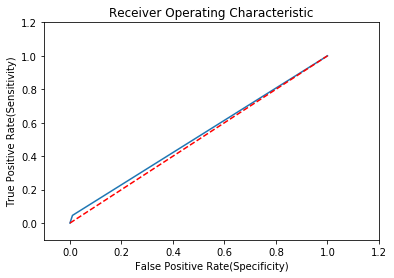

0.5180667777615353

In [377]:
######ROC AND AUC For Fiber bits model #########
###for visualising the plots use matplotlib and import roc_curve,auc from sklearn.metrics 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = x_train3[['default']]
predicted_values1=x_train3[["pred"]]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predicted_values1)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

###Area under Curve-AUC
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

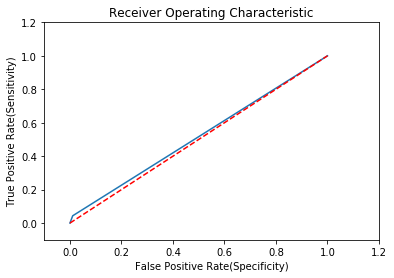

0.5164627873754296

In [378]:
######ROC AND AUC For Fiber bits model #########
###for visualising the plots use matplotlib and import roc_curve,auc from sklearn.metrics 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = x_test2[['default']]
predicted_values1=x_test2[["pred"]]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predicted_values1)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

###Area under Curve-AUC
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [379]:
x_train3.shape

(149259, 14)

In [380]:
x_train3.columns

Index(['OrInterestRate', 'OrUnpaidPrinc', 'NumBorrow', 'DTIRat', 'CreditScore',
       'MortInsPerc', 'CoCreditScore', 'MortInsType', 'Channel_R',
       'FTHomeBuyer_Y', 'LoanPurpose_R', 'OccStatus_P', 'default', 'pred'],
      dtype='object')

In [381]:
x_test2.columns

Index(['OrInterestRate', 'OrUnpaidPrinc', 'NumBorrow', 'DTIRat', 'CreditScore',
       'MortInsPerc', 'CoCreditScore', 'MortInsType', 'Channel_R',
       'FTHomeBuyer_Y', 'LoanPurpose_R', 'OccStatus_P', 'default', 'pred'],
      dtype='object')

In [382]:
x_train4=x_train3.drop(["pred","default"],axis=1).copy()
x_test3=x_test2.drop(["pred","default"],axis=1).copy()

# Decision tree model

In [383]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train4,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [384]:
dt.score(x_train4,y_train)

0.9999933002365017

In [385]:
dt.score(x_test3,y_test)

0.9372638349189334

In [386]:
len(x_train4.columns)

12

In [387]:
# to optimize the accuracy of a model, we can use hyperparameter tunning

from sklearn.model_selection import GridSearchCV
param_grid={"max_depth":np.arange(1,len(x_train4.columns))}


In [388]:
from sklearn.tree import DecisionTreeClassifier
tree=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=10)
tree.fit(x_train4,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8, 

In [389]:
tree.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [390]:
tree.score(x_train4,y_train)


0.960993976912615

In [391]:
tree.score(x_test3,y_test)

0.9536647460806646

In [392]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier(max_depth=11)
dt1.fit(x_train4,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [395]:
train_pred=dt1.predict_proba(x_train4)[::,1]

In [396]:
train_pred.max()

1.0

In [397]:
train_pred.min()

0.0

In [399]:
test_pred=dt1.predict_proba(x_test3)[::,1]

In [398]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train,train_pred)

0.9676602244561624

In [400]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,test_pred)

0.9470407000961298

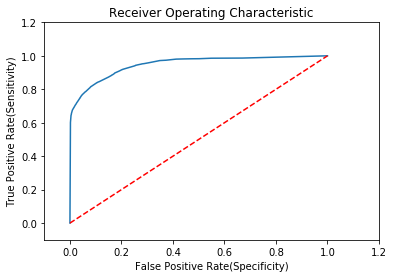

0.9470407000961298

In [402]:
######ROC AND AUC For Fiber bits model #########
###for visualising the plots use matplotlib and import roc_curve,auc from sklearn.metrics 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = y_test
predicted_values1=test_pred
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predicted_values1)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

###Area under Curve-AUC
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [403]:
x_train4.columns

Index(['OrInterestRate', 'OrUnpaidPrinc', 'NumBorrow', 'DTIRat', 'CreditScore',
       'MortInsPerc', 'CoCreditScore', 'MortInsType', 'Channel_R',
       'FTHomeBuyer_Y', 'LoanPurpose_R', 'OccStatus_P'],
      dtype='object')

In [404]:
x_train3.columns

Index(['OrInterestRate', 'OrUnpaidPrinc', 'NumBorrow', 'DTIRat', 'CreditScore',
       'MortInsPerc', 'CoCreditScore', 'MortInsType', 'Channel_R',
       'FTHomeBuyer_Y', 'LoanPurpose_R', 'OccStatus_P', 'default', 'pred'],
      dtype='object')

In [405]:
x_train3["pred"]=dt1.predict_proba(x_train4)[::,1]

In [406]:
x_train3.head()

,OrInterestRate,OrUnpaidPrinc,NumBorrow,DTIRat,CreditScore,MortInsPerc,CoCreditScore,MortInsType,Channel_R,FTHomeBuyer_Y,LoanPurpose_R,OccStatus_P,default,pred
62954,6.375,148000,2.0,30.0,603.0,8.566629,589.000000,1.012632,0,0,0,1,0,0.017544
33959,6.875,122000,2.0,50.0,702.0,10.678711,702.000000,1.024266,0,0,0,0,0,0.014493
128744,6.750,133000,1.0,37.0,647.0,30.000000,696.095799,1.000000,0,0,0,1,1,0.777778
53425,6.875,53000,1.0,41.0,805.0,9.722619,755.124617,0.990392,1,0,0,0,0,0.000188
260687,6.125,208000,1.0,34.0,668.0,25.000000,707.610664,1.000000,1,0,1,1,0,0.000000


In [409]:
x_train5=x_train3.sort_values("pred",ascending=False).reset_index().drop(["index"],axis=1)
x_train5.head()

,OrInterestRate,OrUnpaidPrinc,NumBorrow,DTIRat,CreditScore,MortInsPerc,CoCreditScore,MortInsType,Channel_R,FTHomeBuyer_Y,LoanPurpose_R,OccStatus_P,default,pred
0,6.875,122000,2.0,55.0,627.0,25.000000,699.930530,1.000000,0,1,0,1,1,1.0
1,6.750,235000,1.0,62.0,602.0,30.000000,695.003103,1.000000,1,1,0,1,1,1.0
2,6.250,132000,1.0,37.0,793.0,10.866982,676.356819,1.128483,0,0,0,1,1,1.0
3,7.125,189000,1.0,41.0,656.0,25.000000,684.557240,1.000000,0,0,1,1,1,1.0
4,6.500,147000,1.0,49.0,724.0,-2.794568,690.977778,1.066775,0,0,1,1,1,1.0


In [410]:
pd.crosstab(pd.qcut(x_train5["pred"],q=10),x_train5["default"])

ValueError: Bin edges must be unique: array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.87617261e-04,
       2.14951039e-03, 5.04201681e-03, 2.43902439e-02, 4.90666667e-02,
       9.32642487e-02, 2.80120482e-01, 1.00000000e+00]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [411]:
x_train5.shape

(149259, 14)

In [412]:
pd.qcut(x_train5.index,q=10)

[(-0.001, 14925.8], (-0.001, 14925.8], (-0.001, 14925.8], (-0.001, 14925.8], (-0.001, 14925.8], ..., (134332.2, 149258.0], (134332.2, 149258.0], (134332.2, 149258.0], (134332.2, 149258.0], (134332.2, 149258.0]]
Length: 149259
Categories (10, interval[float64]): [(-0.001, 14925.8] < (14925.8, 29851.6] < (29851.6, 44777.4] < (44777.4, 59703.2] ... (89554.8, 104480.6] < (104480.6, 119406.4] < (119406.4, 134332.2] < (134332.2, 149258.0]]

In [413]:
pd.crosstab(pd.qcut(x_train5.index,q=10),x_train5["default"])

default,0,1
row_0,,
"(-0.001, 14925.8]",1954,12972
"(14925.8, 29851.6]",12315,2611
"(29851.6, 44777.4]",13750,1176
"(44777.4, 59703.2]",14402,524
"(59703.2, 74629.0]",14746,180
"(74629.0, 89554.8]",14872,53
"(89554.8, 104480.6]",14904,22
"(104480.6, 119406.4]",14926,0
"(119406.4, 134332.2]",14926,0
